<a href="https://colab.research.google.com/github/udaykiran83358gmailcom/aiml-lab/blob/main/lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implement Logistic Regression Model Using Titanic Ship Dataset

In [31]:
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import numpy as np

In [ ]:
d=pd.read_csv("/content/Titanic-Dataset.csv")
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
d.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#describe() is method to get the statistical summary of the various features of hte data set
d.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
d.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
s=d.describe()
s



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,714.0,891,891,891,891.00,204,889
unique,891,2,3,891,2,88.0,7,7,681,248.00,147,3
top,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
freq,1,549,491,1,577,30.0,608,678,7,43.00,4,644


<Axes: xlabel='Survived', ylabel='count'>

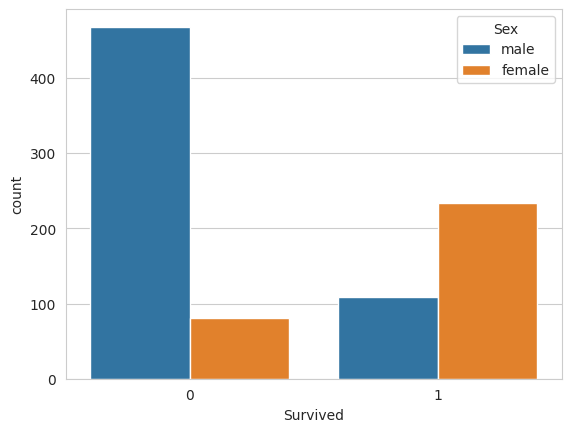

In [45]:
sea.set_style('whitegrid')
sea.countplot(x='Survived',hue='Sex', data=d)

what about any pattern related to passenger class
it looks like disproportioly large

<Axes: xlabel='Survived', ylabel='count'>

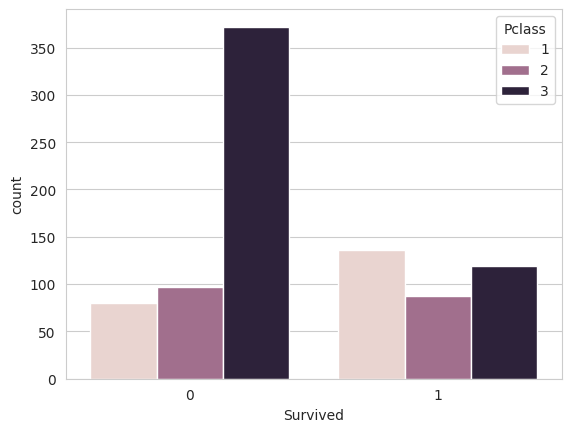

In [49]:
sea.set_style('whitegrid')
sea.countplot(x='Survived',hue='Pclass',data=d)

Text(0.5, 1.0, 'people survived by class')

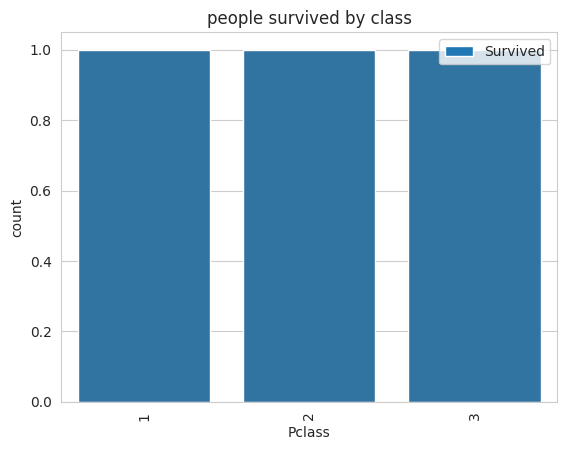

In [51]:
f_class_survived=d.groupby('Pclass')['Survived'].mean()
f_class_survived=pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
sea.countplot(x='Survived',data=f_class_survived)
plt.title('people survived by class')

#siblings and spouse

<Axes: xlabel='Survived', ylabel='count'>

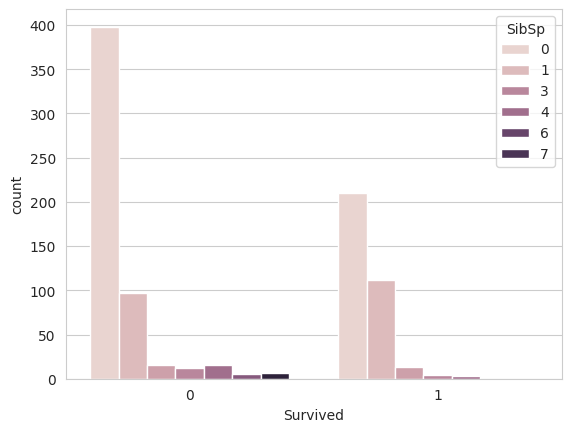

In [53]:
sea.set_style('whitegrid')
sea.countplot(x='Survived',hue='SibSp',data=d)

#**part2**

In [56]:
#d.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)
#c=d.dropna(inplace=True)
d.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.1,S
4,0,3,male,35.0,0,0,8.05,S


In [61]:
sex= pd.get_dummies(d['Sex'],drop_first=True)
embark=pd.get_dummies(d['Embarked'],drop_first='True')


In [ ]:
d.drop(['sex','Embarked'],axis=1,inplace='True')
